In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_theme(style="darkgrid")


In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df=iris
label_col=iris.iloc[:,4]
le = preprocessing.LabelEncoder()
le.fit(label_col)
encoded_col=le.transform(label_col)
df.iloc[:,4]=encoded_col
# df

### 类别特征编码

In [5]:
def Label_Encode(df,label_col_index):
    label_col=iris.iloc[:,label_col_index]
    le = preprocessing.LabelEncoder()
    le.fit(label_col)
    encoded_col=le.transform(label_col)
    df.iloc[:,label_col_index]=encoded_col
    return df
df_test=Label_Encode(df,4)
df_test

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 可视化

### 分类数据，以条形图为例

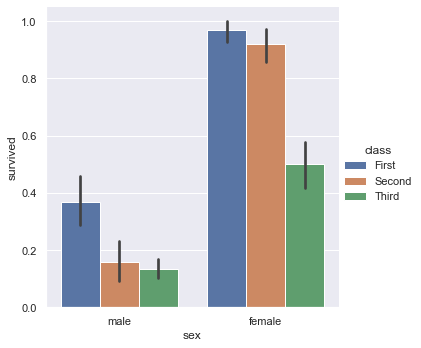

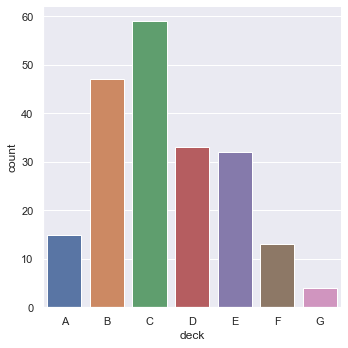

In [6]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
sns.catplot(x="deck", kind="count", data=titanic)
# def bar_plot_MulVar(df,x_name,y_name,hue_name):
#     sns.catplot(x=x_name, y=y_name, hue=hue_name,kind="bar",data=df)
# def bar_plot_UniVar(df,x_name):
#     sns.catplot(x=x_name, kind="count", data=df)
# bar_plot_UniVar(titanic,"deck")
# bar_plot_MulVar(titanic,"sex", "survived", "class")

### 分组数据(数值型数据)，以直方图、箱线图、散点图为例，旨在反映分布情况

C:\ANACONDA3\envs\Simi_com\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ANACONDA3\envs\Simi_com\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ANACONDA3\envs\Simi_com\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ANACONDA3\envs\Simi_com\lib\site-packages\matplotlib\axes\_base.py:278: F

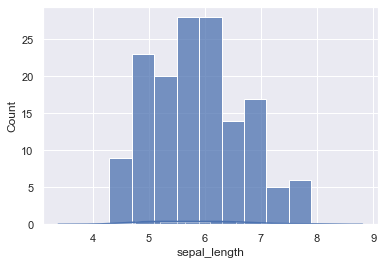

In [8]:
ax1=sns.histplot(df["sepal_length"])
ax = sns.distplot(df.iloc[:,0])

# def hist_plot(df,IndexName):
#     ax1=sns.histplot(df[IndexName])
# def dist_plot(df,IndexName):
#     ax = sns.distplot(df[IndexName])
# def box_plot(df,Index_A,Index_B):
#     df.iloc[:,Index_A:Index_B].boxplot()
# # hist_plot(df,"sepal_length")
# dist_plot(df,"sepal_length")

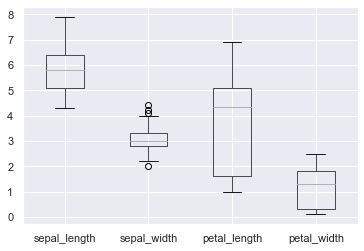

In [9]:
# box_plot(df,0,4)
df.iloc[:,0:4].boxplot()

### 时变数据，以折线图为例

In [10]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


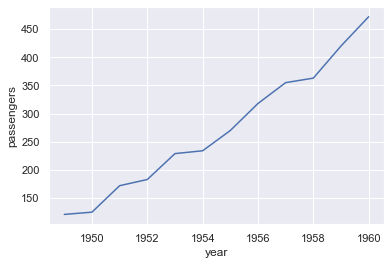

In [11]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")
# def line_plot(df,x_name,y_name):
#     sns.lineplot(data=flights, x=x_name, y=y_name)
# line_plot(flights,"year","passengers")

### 多变量数据，以散点图矩阵为例，第i行第j列散点图反映第i、j个属性的相关关系

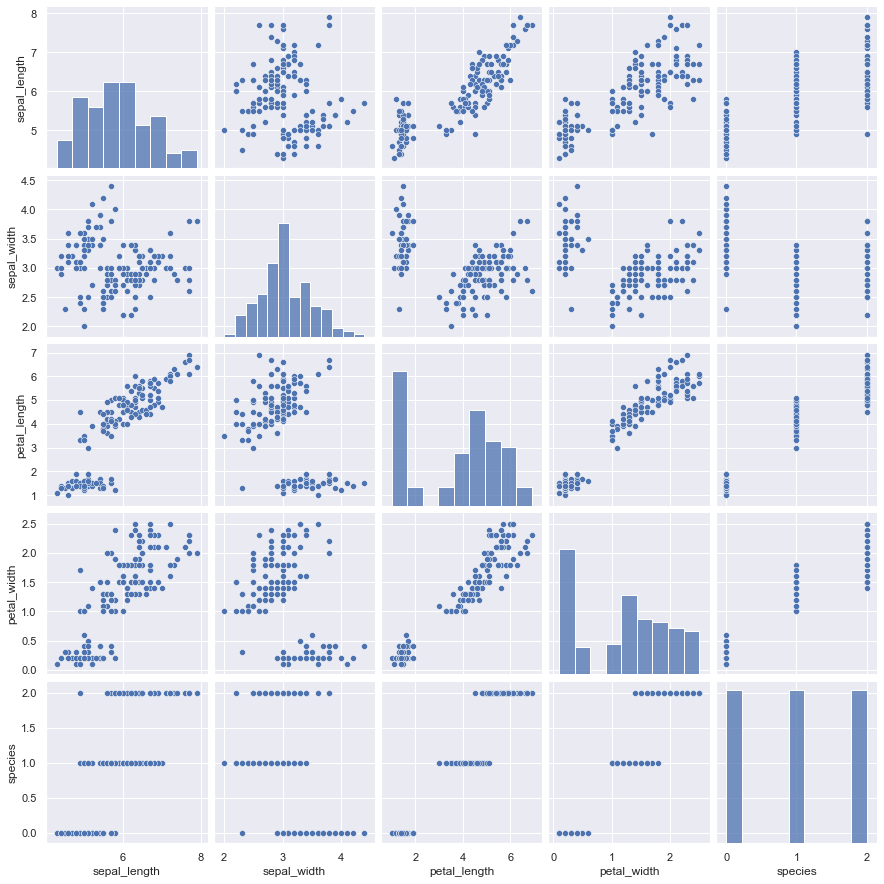

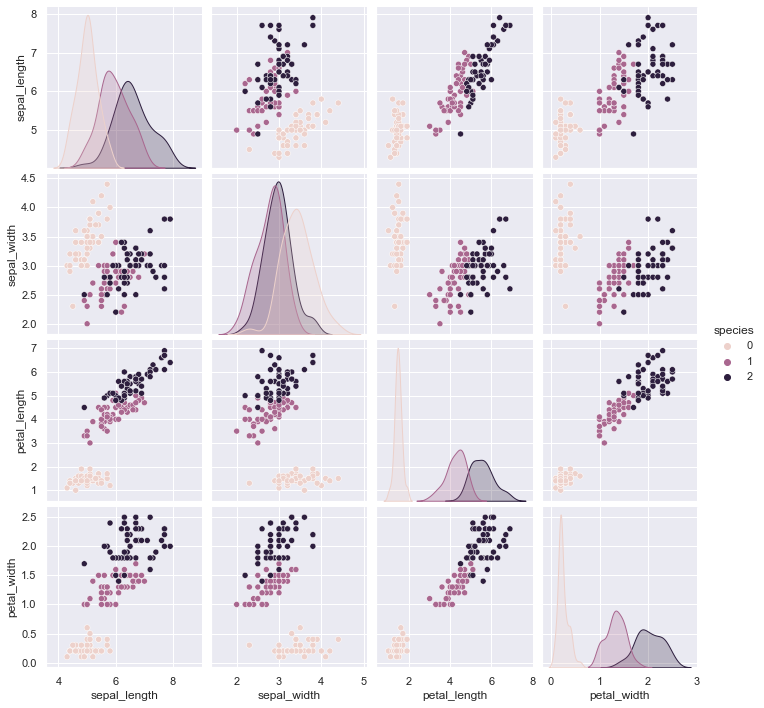

In [12]:
sns.pairplot(df)
sns.pairplot(df, hue="species")
# def pair_plot(df,hue_name):
#     sns.pairplot(df,hue=hue_name)
# pair_plot(df,"species")

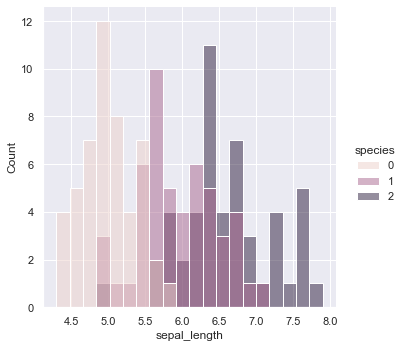

In [13]:
sns.displot(df, x="sepal_length", hue='species',bins=20)
# def dis_plot_MulVar(df,x_name,hue_name,bins_num):
#     sns.displot(df, x=x_name, hue=hue_name,bins=bins_num)
# dis_plot_MulVar(df,"sepal_length",'species',20)

### 表格形式

In [14]:
#基本统计
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
#累计统计
cum_df=df.iloc[:,0:4].cumsum()
cum_df
# type(cum_df)#pandas.core.frame.DataFrame
cum_df.iloc[-1:]#dataframe最后一行，累计

,sepal_length,sepal_width,petal_length,petal_width
149,876.5,458.6,563.7,179.9


In [17]:
#窗口计算，依次计算相邻w个元素的统计值，用.rolling(w).sum()计算
df_roll_sum=df.rolling(10).mean()
df_roll_sum

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
145,6.52,3.10,5.39,2.18,2.0
146,6.52,3.01,5.33,2.13,2.0
147,6.53,3.00,5.30,2.15,2.0
148,6.55,3.04,5.36,2.20,2.0


In [18]:
#变量之间相关性，以pearson相关系数为例
#.cov()计算协方差矩阵
#.corr()计算相关系数矩阵，Pearson，Kendall等系数
df_cov=df.cov()
df_cov


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,0.685694,-0.042434,1.274315,0.516271,0.530872
sepal_width,-0.042434,0.189979,-0.329656,-0.121639,-0.152349
petal_length,1.274315,-0.329656,3.116278,1.295609,1.372483
petal_width,0.516271,-0.121639,1.295609,0.581006,0.597315
species,0.530872,-0.152349,1.372483,0.597315,0.671141


In [20]:
df_cor=df.corr(method='pearson')
df_cor

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


## 数据建模/分析预测

### 聚类

In [19]:
import scipy
from scipy.cluster.vq import vq,kmeans,whiten

In [20]:
help(scipy.cluster.vq)

Help on module scipy.cluster.vq in scipy.cluster:

NAME
    scipy.cluster.vq

DESCRIPTION
    K-means clustering and vector quantization (:mod:`scipy.cluster.vq`)
    
    Provides routines for k-means clustering, generating code books
    from k-means models, and quantizing vectors by comparing them with
    centroids in a code book.
    
    .. autosummary::
       :toctree: generated/
    
       whiten -- Normalize a group of observations so each feature has unit variance
       vq -- Calculate code book membership of a set of observation vectors
       kmeans -- Performs k-means on a set of observation vectors forming k clusters
       kmeans2 -- A different implementation of k-means with more methods
               -- for initializing centroids
    
    Background information
    The k-means algorithm takes as input the number of clusters to
    generate, k, and a set of observation vectors to cluster.  It
    returns a set of centroids, one for each of the k clusters.  An
    ob

In [26]:
obs=df.iloc[:,0]

In [27]:
type(obs)

pandas.core.series.Series

In [28]:
data= np.array(obs)
type(data)#numpy.ndarray

In [30]:
whiten=whiten(data)
centroids,_=kmeans(whiten,3)
result,_=vq(whiten,centroids)
print(result)
# type(result)#numpy.ndarray

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 0 2 0 0 1 1 1 1 2 1 1 1 1 1 1 2 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 0 1 1 1 1 0 1 2 1 2 2 2 2 0 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2
 1 1]


In [32]:
encoded_col

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
#余弦相似度
from scipy import spatial
res = 1 - spatial.distance.cosine(result, encoded_col)
res

0.9113294688411048

In [41]:
#欧氏距离
from numpy import dot
from numpy.linalg import norm
a=result
b=encoded_col
res = dot(a, b) / (norm(a) * norm(b))
res

0.9113294688411047